**Preparing data:** Run the next cells to download and prepare the datasets and util functions.


In [1]:
import sys
download_data = False

if 'google.colab' in sys.modules:
    download_data = True

In [2]:
if download_data:
    !wget --no-cache -O init.py -q https://raw.githubusercontent.com/DaielChom/ann_leaf_classification/master/init.py
    from init import download_utils, unzip_leaf_dataset, dataset_dir
    download_utils(force_download=False)

In [3]:
if download_data:
    !mkdir ./local/datasets/
    !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=19208gOk2e6cpZ9dxtGF5HKHGYWn01VRo' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=19208gOk2e6cpZ9dxtGF5HKHGYWn01VRo" -O local/datasets/sales.zip && rm -rf /tmp/cookies.txt

In [4]:
if download_data:
    unzip_leaf_dataset()

**Libraries**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import local.lib as lib


from init import dataset_dir

# Data exploration
The task consist in predict total sales for every product and store in the next month. We have daily sales data of different products from different shops.

In [6]:
dataset = lib.load_dataset(dataset_dir)

In [7]:
dataset.head()

,date,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,2013-01-02,59,22154,999.00,1.0,37
1,2013-01-03,25,2552,899.00,1.0,58
2,2013-01-05,25,2552,899.00,-1.0,58
3,2013-01-06,25,2554,1709.05,1.0,58
4,2013-01-15,25,2555,1099.00,1.0,56


We have data from 2013 to 2015

In [45]:
date_min = dataset.date.min()
date_max = dataset.date.max()
date_min, date_max

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-10-31 00:00:00'))

In [46]:
daily_sells = dataset.groupby(["date", "shop_id"]).item_cnt_day.sum().to_frame("daily_sells")
daily_sells = daily_sells.reset_index()

In [10]:
shops = daily_sells.shop_id.value_counts().index.tolist()

Text(0.5, 1.0, 'Daily sells per shop in 2013-4')

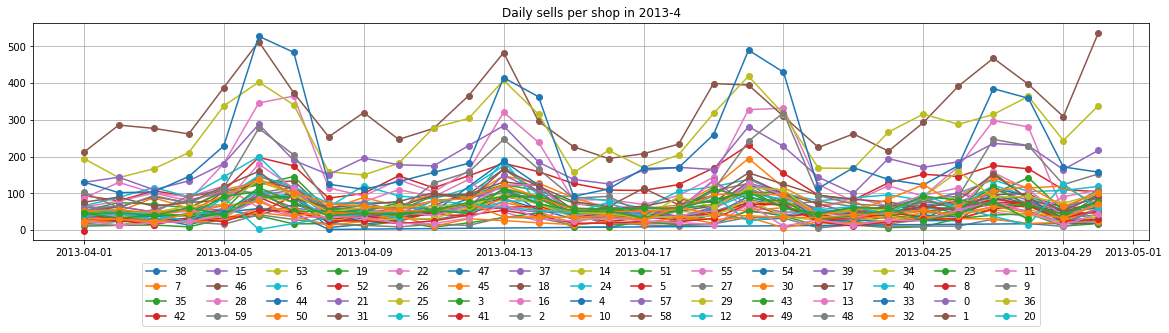

In [44]:
plt.figure(figsize=(20,4))

month = 4
year = 2013
get_month = lambda x:x.month
get_year = lambda x:x.year

for shop in shops:
    
    month_data = daily_sells[(daily_sells.date.apply(get_month)==month)&(daily_sells.date.apply(get_year)==year)]
    aux = month_data[month_data.shop_id==shop][["date", "daily_sells"]]
    plt.plot(aux.date.values, aux.daily_sells.values, marker="o", label=shop)
    
plt.grid()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08),
          fancybox=True, ncol=15)
plt.title("Daily sells per shop in {}-{}".format(year, month))

Text(0, 0.5, 'products sell')

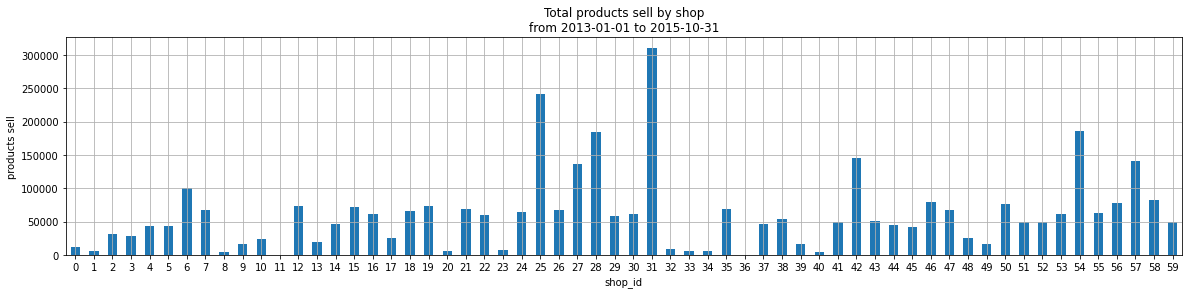

In [22]:
dataset.groupby("shop_id").item_cnt_day.sum().plot.bar(figsize=(20, 4))
plt.grid()
plt.title("Total products sell by shop\nfrom {} to {}".format(date_min.date(), date_max.date()));
plt.xticks(rotation="horizontal");
plt.ylabel("products sell")

In [28]:
get_money_income = lambda x:(x.item_price * x.item_cnt_day).sum()
money_income = dataset.groupby("shop_id").apply(get_money_income)

Text(0, 0.5, 'money income')

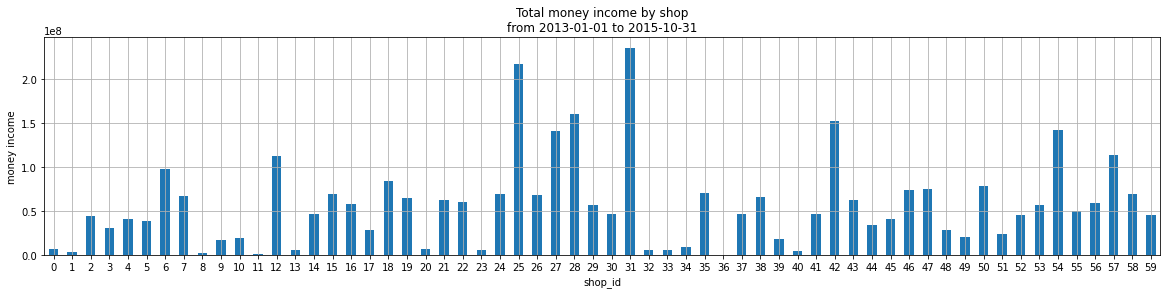

In [31]:
money_income.plot.bar(figsize=(20, 4))
plt.grid()
plt.title("Total money income by shop\nfrom {} to {}".format(date_min.date(), date_max.date()));
plt.xticks(rotation="horizontal");
plt.ylabel("money income")

In [69]:
get_daily_sells = lambda x:x.groupby("date").item_cnt_day.sum().to_frame().T

In [74]:
daily_sell_per_shop = dataset.groupby(["shop_id"]).apply(get_daily_sells)
daily_sell_per_shop = daily_sell_per_shop.droplevel(1)

In [79]:
img = daily_sell_per_shop.values

Text(0.5, 1.0, 'available data per shop')

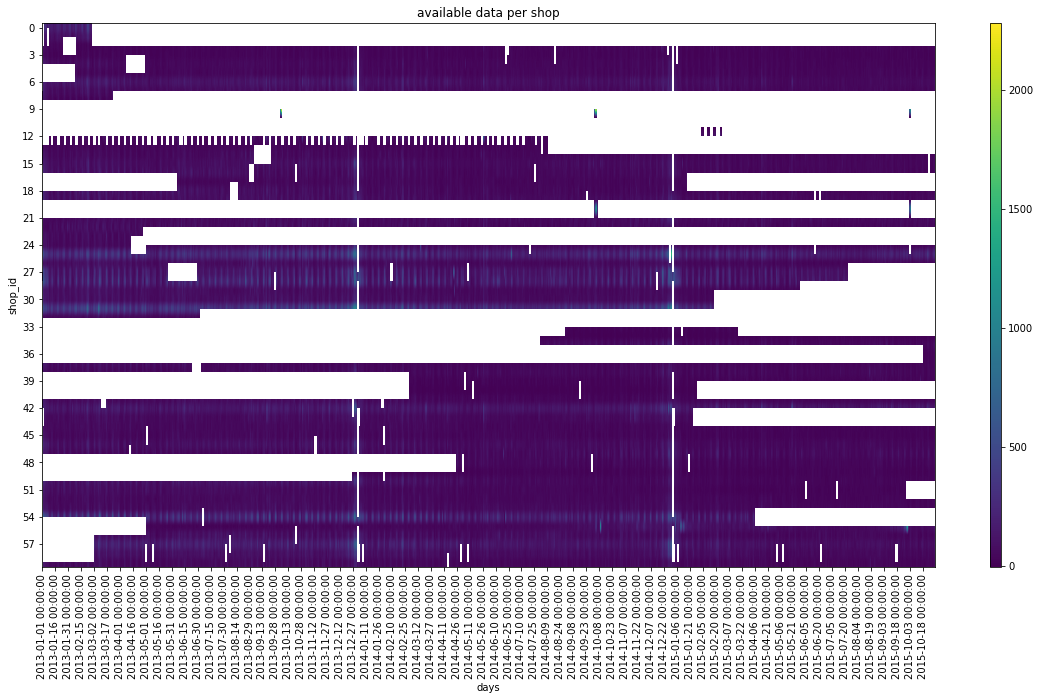

In [119]:
plt.figure(figsize=(20, 10))
plt.imshow(img, aspect="auto")
plt.colorbar(aspect=50)
plt.xticks([i for i in range(daily_sell_per_shop.columns.shape[0])][::15], daily_sell_per_shop.columns.tolist()[::15], rotation=90);
plt.yticks([i for i in range(daily_sell_per_shop.index.shape[0])][::3], daily_sell_per_shop.index.tolist()[::3]);
plt.ylabel("shop_id")
plt.xlabel("days")
plt.title("available data per shop")

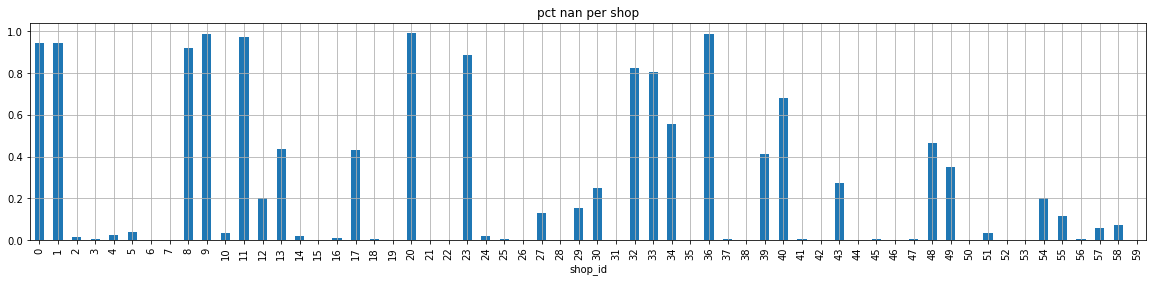

In [125]:
daily_sell_per_shop.T.isna().mean().plot.bar(figsize=(20,4))
plt.grid()
plt.title("pct nan per shop");

In [293]:
product = dataset.item_id.sample().values[0]

In [294]:
price_history = dataset[dataset.item_id==product][["date", "shop_id", "item_price"]]

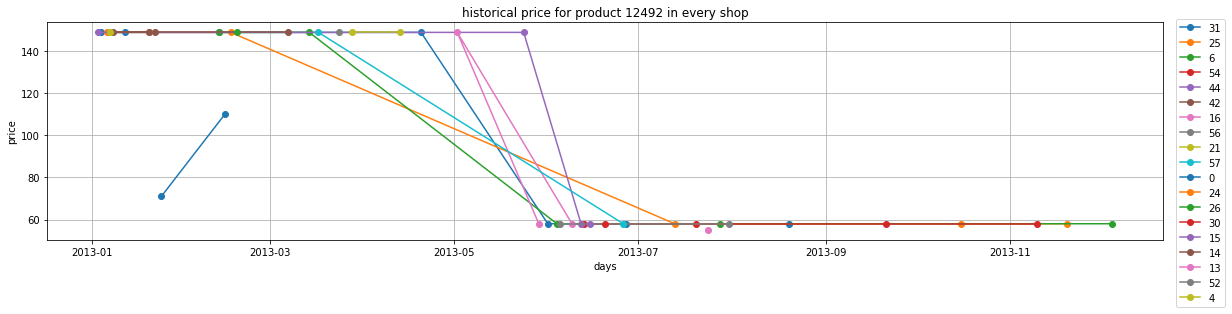

In [295]:
plt.figure(figsize=(20, 4))
for shop in price_history.shop_id.value_counts().index:
    aux = price_history[price_history.shop_id==shop]
    plt.plot(aux.date.values, aux.item_price.values, marker="o", label=shop)
plt.grid()
plt.xlabel("days")
plt.ylabel("price")
plt.title("historical price for product {} in every shop".format(product))
plt.legend(loc='upper right', bbox_to_anchor=(1.06, 1.04),
          fancybox=True, ncol=1)

In [303]:
amount_item_sold = dataset.groupby(["item_id", "date"]).item_cnt_day.sum().to_frame().reset_index()

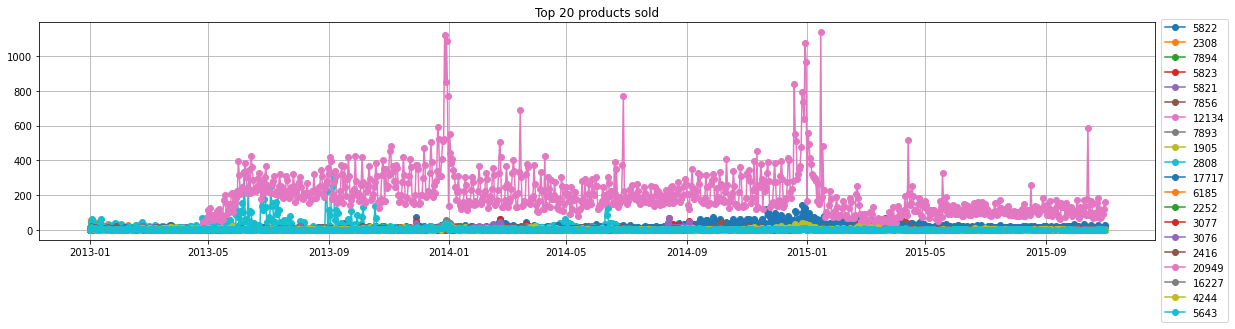

In [324]:
plt.figure(figsize=(20, 4))
for item in amount_item_sold.item_id.value_counts().index[:20]:
    aux = amount_item_sold[amount_item_sold.item_id==item]
    plt.plot(aux.date.values, aux.item_cnt_day.values, marker="o", label=item)
    
plt.grid()
plt.legend()
plt.legend(loc='upper right', bbox_to_anchor=(1.07, 1.04),
          fancybox=True, ncol=1)
plt.title("Top 20 products sold");

### select some products

In [329]:
nan_pct = daily_sell_per_shop.T.isna().mean()

In [331]:
products_to_use = nan_pct[nan_pct<0.5].index

In [332]:
products_to_use

Int64Index([ 2,  3,  4,  5,  6,  7, 10, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22,
            24, 25, 26, 27, 28, 29, 30, 31, 35, 37, 38, 39, 41, 42, 43, 44, 45,
            46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
           dtype='int64', name='shop_id')

## Building dataset